In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
import matplotlib 

<h3>Generally we first look at what features are important(corr) then work on missing data then remove outliers and lastly we do normalization, Homoscedasticity , linear realation, absense of correlated error. But here we will directly jump to missing datas since we have done the other things in the previous notebook</h3>

In [66]:
warnings.filterwarnings('ignore')

In [67]:
plt.style.use('dark_background')

In [68]:
train = pd.read_csv('./files/train.csv')
test = pd.read_csv('./files/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
print(f'The train data shape is {train.shape} and test shape is {test.shape}')

The train data shape is (1460, 81) and test shape is (1459, 80)


In [70]:
# since we do not need the ID column we will remove this column
train.drop(columns=['Id'], inplace=True)
test.drop(columns=['Id'], inplace=True)

<h3>Outlayer removal</h3>

<p>Lets how the quantitative values perform with SalePrice</p>

In [71]:
quantitative = train.corr().columns

In [72]:
qualititative = []
for col in train.columns:
    if col == 'SalePrice':
        qualititative.append(col)
        continue
    if col in quantitative:
        continue
        
    qualititative.append(col)

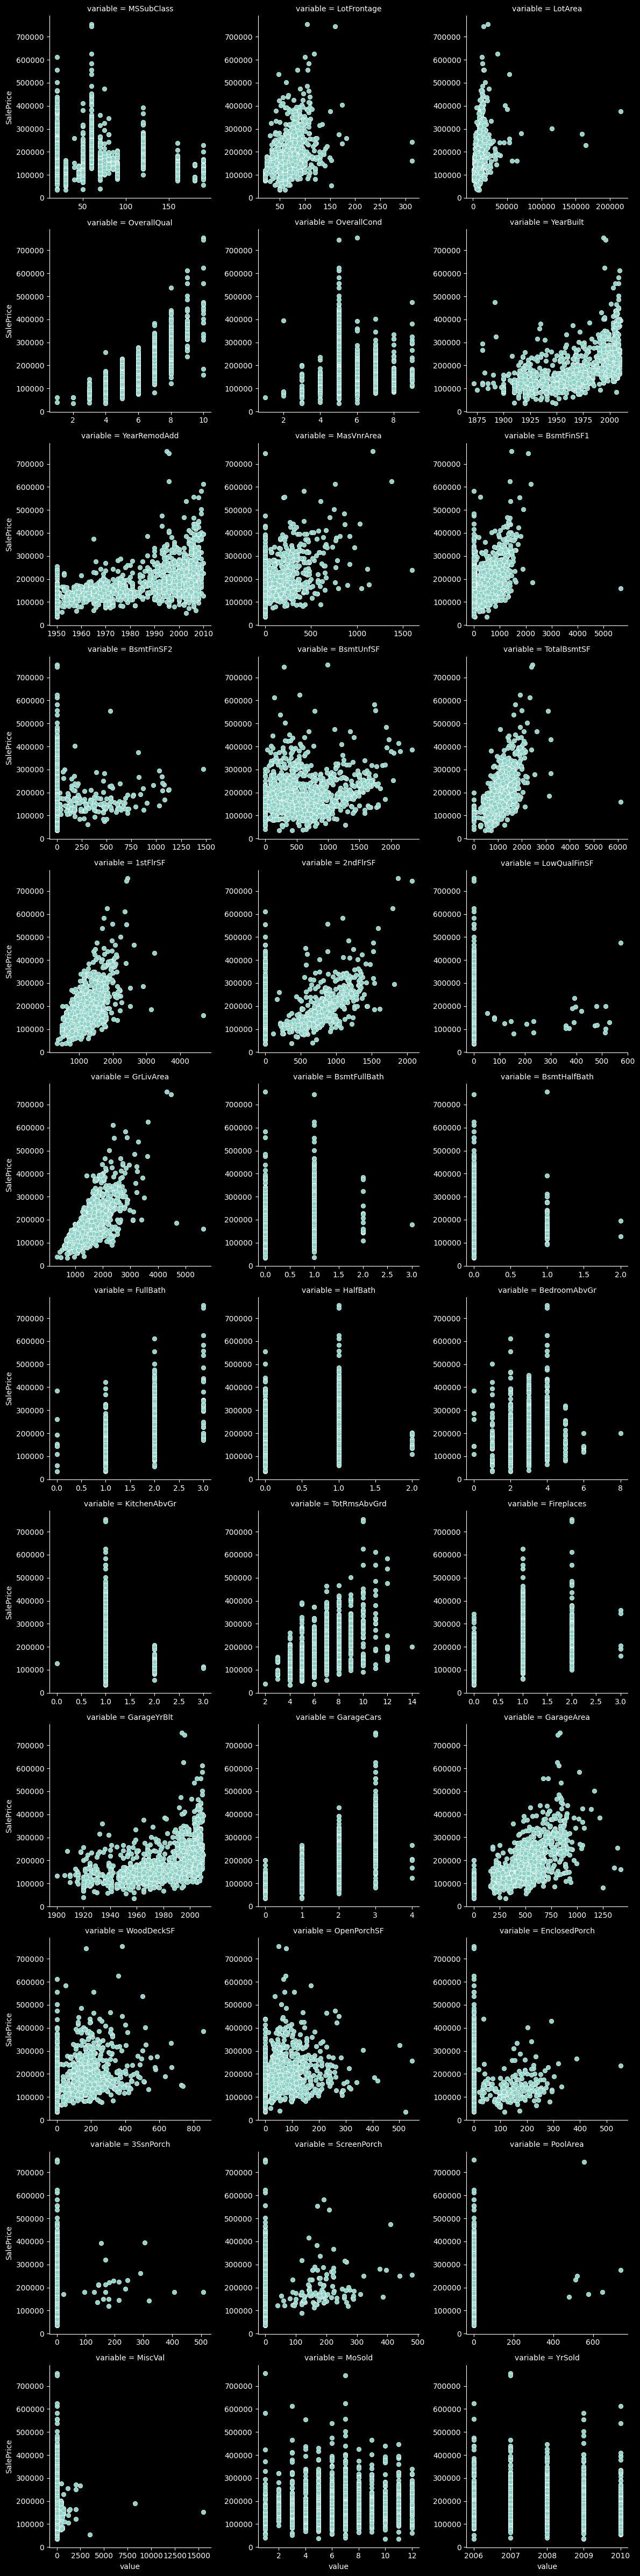

In [73]:
f = pd.melt(train, id_vars='SalePrice', value_vars=quantitative)
g = sns.FacetGrid(f, col='variable', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'value', 'SalePrice')
plt.show()

<p>We can see that there are some outlayers. We can look into each graph and remove them manually</p>

<p>But since it is just the initial version we will only remove the GrlivArea outlayers</p>

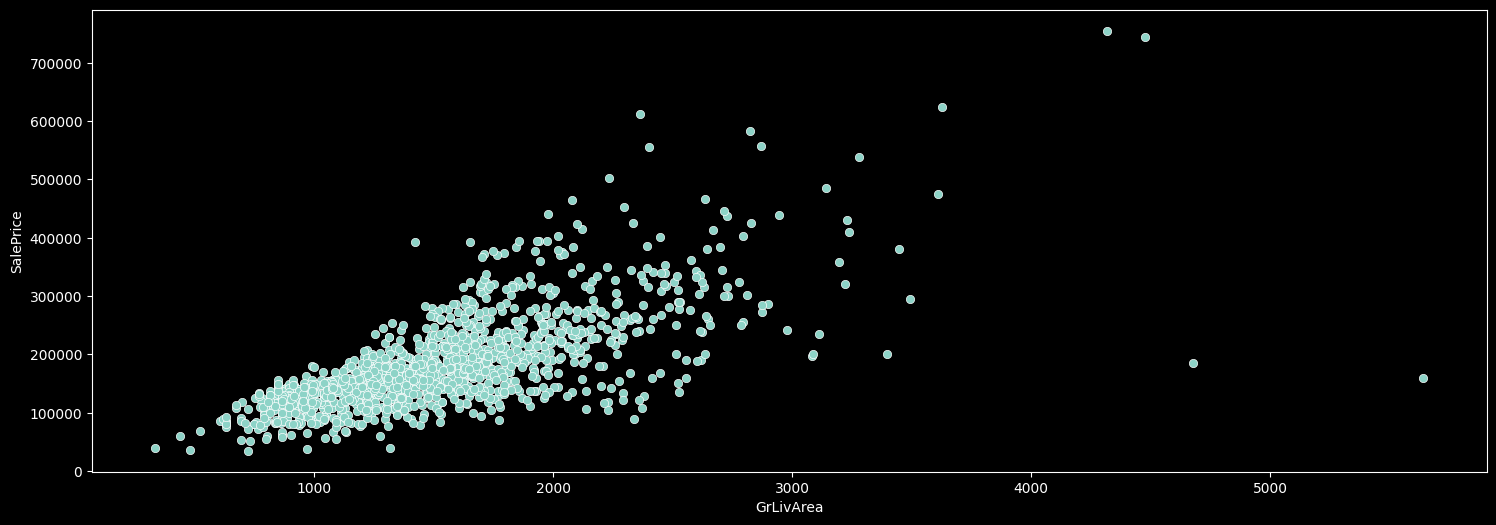

In [74]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

In [75]:
train = train[train['GrLivArea'] < 4000]

In [76]:
train.shape

(1456, 80)

<p>For Qualtitative the realtions are</p>

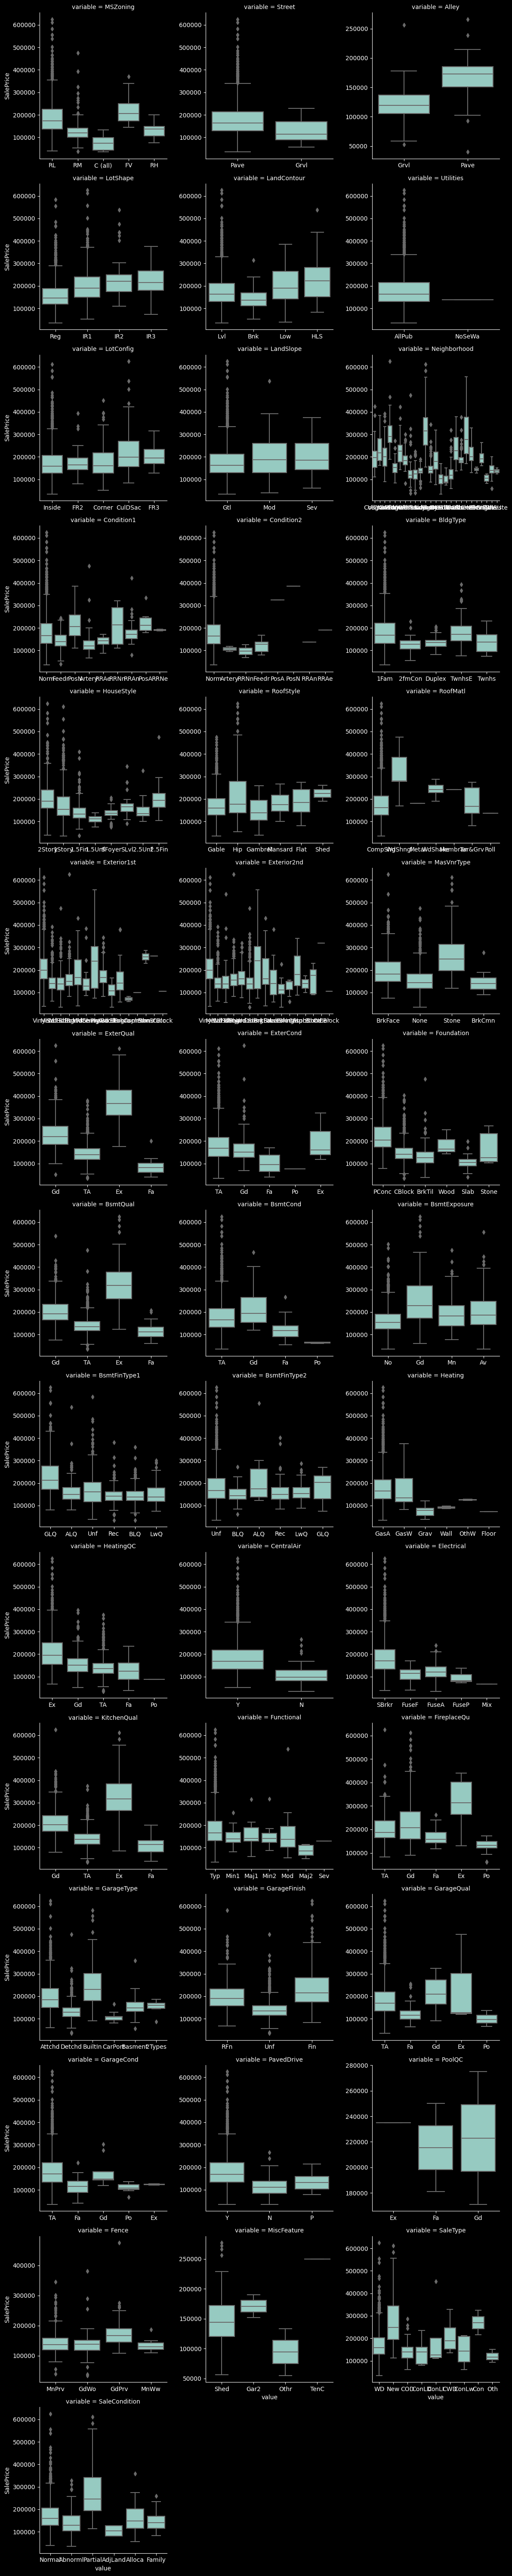

In [77]:
f = pd.melt(train, id_vars='SalePrice', value_vars=qualititative)
g = sns.FacetGrid(f, col='variable', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.boxplot, 'value', 'SalePrice')
plt.show()

<h3>Handling Missing Values</h3>

In [78]:
y = train['SalePrice']
train.drop('SalePrice', inplace=True, axis=1)

In [79]:
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values()

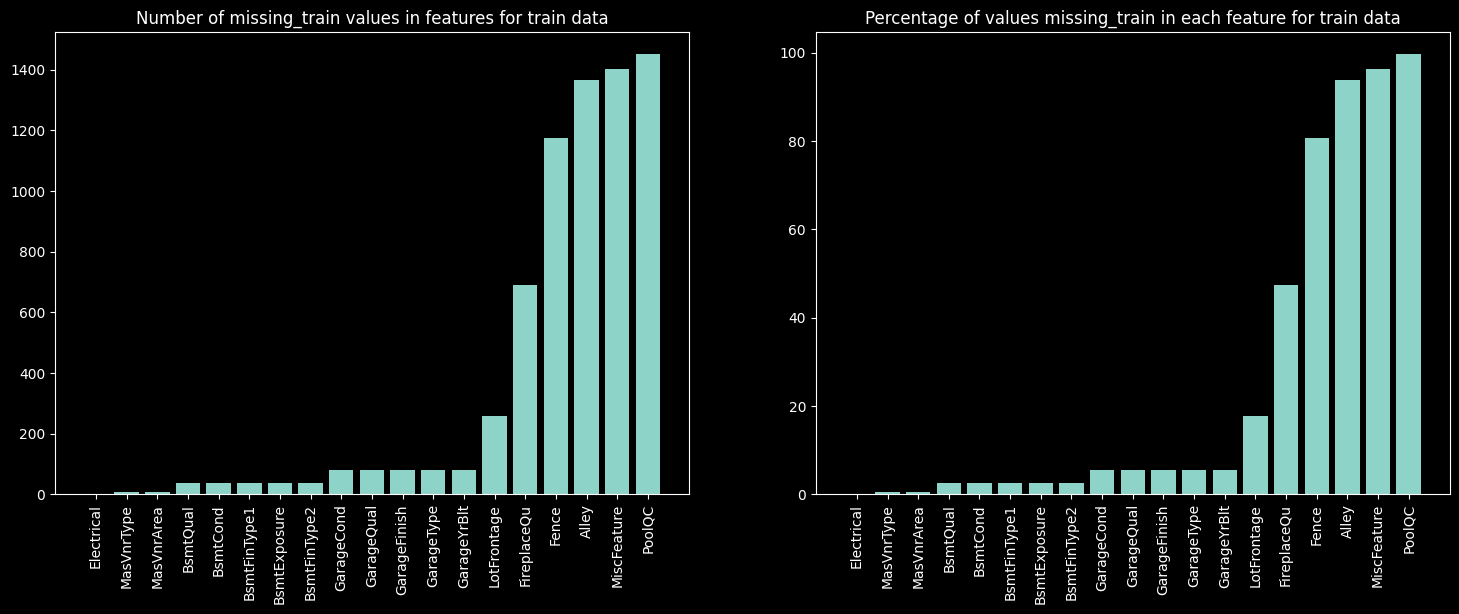

In [80]:
percent = (missing_train/train.shape[0])* 100
cols = missing_train.index


matplotlib.rcParams['figure.figsize'] = (18, 6)
plt.subplot(1, 2, 1)

plt.bar(cols, missing_train.values)
plt.title('Number of missing_train values in features for train data')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(cols, percent)
plt.xticks(rotation=90)
plt.title('Percentage of values missing_train in each feature for train data')

plt.show()

<p>For test data-----------</p>

In [81]:
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values()

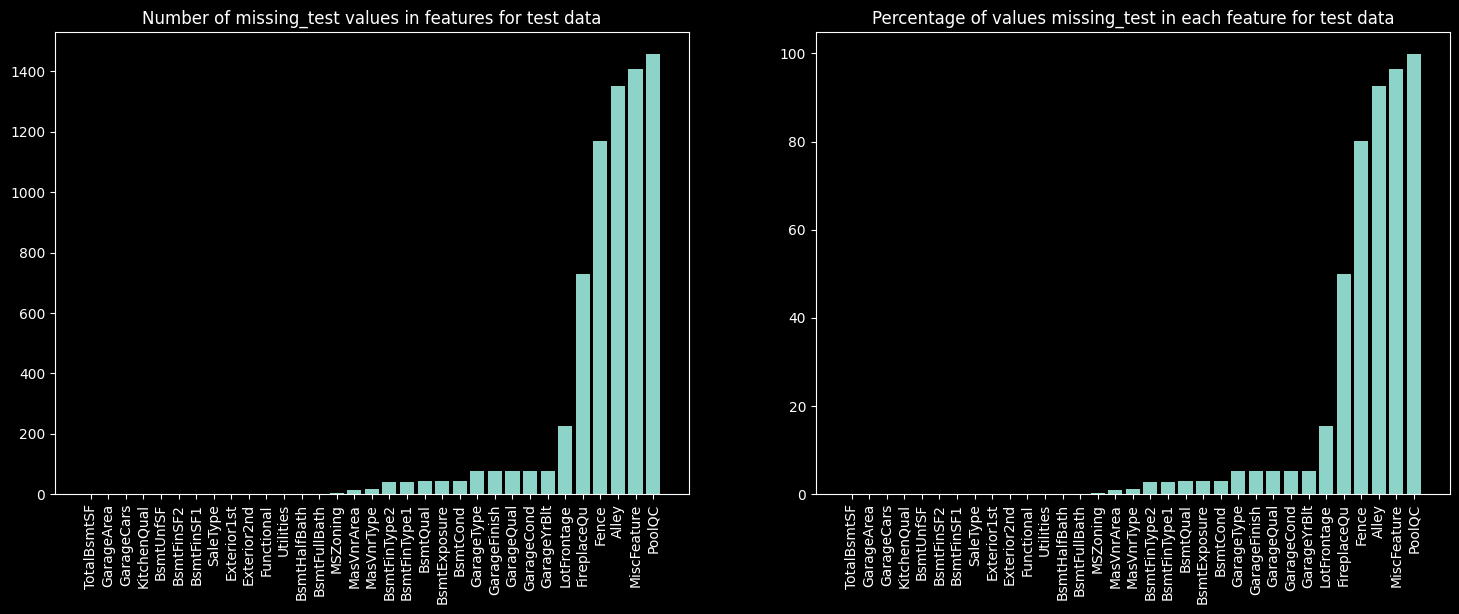

In [82]:
percent = (missing_test/test.shape[0])* 100
cols = missing_test.index

matplotlib.rcParams['figure.figsize'] = (18, 6)
plt.subplot(1, 2, 1)

plt.bar(cols, missing_test.values)
plt.title('Number of missing_test values in features for test data')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(cols, percent)
plt.xticks(rotation=90)
plt.title('Percentage of values missing_test in each feature for test data')

plt.show()

<p>The looks a little different than train's</p>

In [83]:
missing = pd.concat([missing_test, missing_train], axis=1)
missing.columns = ['Test data', 'Train data']
missing.sample(5)

,Test data,Train data
BsmtCond,45.0,37.0
GarageFinish,78.0,81.0
BsmtFinType1,42.0,37.0
FireplaceQu,730.0,690.0
Exterior2nd,1.0,NaN


<p>Test data has more features which has missing values</p>

<h4>We took care of all the missing values</h4>

<p>We generally remove a column if 15 percent of the data is missing. But before doing that lets try to fill in the missing values</p>

In [84]:
# the only purpose of having concatening train and test is find the most occurent value in the whole dataset for any feature
# required
all_data = pd.concat([train, test])

<p>First we will fill in the categorical missing values</p>

In [85]:
# lets define a general function to fill in na value

def fill_null(df, feature, value):
    df.loc[:, feature] = df.loc[:, feature].fillna(value)

In [86]:
# missing quantitative features and qualitative
quantitative_missing = set(all_data[missing.index].corr().columns)
qualitative_missing = set(missing.index).difference(quantitative_missing)
print(f'Categorical features with missing values: {qualitative_missing}')

Categorical features with missing values: {'GarageType', 'MiscFeature', 'FireplaceQu', 'Exterior2nd', 'BsmtFinType2', 'MSZoning', 'BsmtCond', 'GarageCond', 'Alley', 'SaleType', 'GarageQual', 'BsmtExposure', 'Utilities', 'Electrical', 'Functional', 'MasVnrType', 'PoolQC', 'BsmtQual', 'BsmtFinType1', 'Fence', 'KitchenQual', 'Exterior1st', 'GarageFinish'}


In [87]:
# for POOLQC NA means NO POOL
fill_null(train, 'PoolQC', "No") #for train
fill_null(test, "PoolQC", 'No') # for test

# for MiscFeature NA means NO other feature
fill_null(train, 'MiscFeature', "No") #for train
fill_null(test, "MiscFeature", 'No') # for test

# for Alley NA means No Alley Access
fill_null(train, 'Alley', "No") #for train
fill_null(test, "Alley", 'No') # for test

# for Fence NA means No Fence
fill_null(train, 'Fence', "No") #for train
fill_null(test, "Fence", 'No') # for test

# for FireplaceQu NA means No FirePlace
fill_null(train, 'FireplaceQu', "No") #for train
fill_null(test, "FireplaceQu", 'No') # for test

# for BsmtFinType1 NA means No Basement
fill_null(train, 'BsmtFinType1', "No") #for train
fill_null(test, "BsmtFinType1", 'No') # for test


# for BsmtFinType1 NA means No Basement
fill_null(train, 'BsmtFinType2', "No") #for train
fill_null(test, "BsmtFinType2", 'No') # for test

# for SaleType NA we will fillin the value.values[0] with the most occurent value.values[0]
value = all_data['SaleType'].mode().values[0]

fill_null(train, 'SaleType', value) #for train
fill_null(test, "SaleType", value) # for test

# for GarageType NA means No Garage
fill_null(train, 'GarageType', "No") #for train
fill_null(test, "GarageType", 'No') # for test

# for BsmtExposure NA means No Basement
fill_null(train, 'BsmtExposure', "No") #for train
fill_null(test, "BsmtExposure", 'No') # for test


# for GarageFinish NA means No Garage
fill_null(train, 'GarageFinish', "No") #for train
fill_null(test, "GarageFinish", 'No') # for test

# for MasVnrType NA means probably means No(although not absolutely correct) since majority of the value.values[0]s are No
fill_null(train, 'MasVnrType', "No") #for train
fill_null(test, "MasVnrType", 'No') # for test

# for Exterior2nd NA we will fillin the value.values[0] with the most occurent value.values[0]
value = all_data['Exterior2nd'].mode().values[0]

fill_null(train, 'Exterior2nd', value) #for train
fill_null(test, "Exterior2nd", value) # for test

# for BsmtCond NA means No Basement
fill_null(train, 'BsmtCond', "No") #for train
fill_null(test, "BsmtCond", 'No') # for test


# for GarageQual NA means No Garage
fill_null(train, 'GarageQual', "No") #for train
fill_null(test, "GarageQual", 'No') # for test

# for GarageCond NA means No Garage
fill_null(train, 'GarageCond', "No") #for train
fill_null(test, "GarageCond", 'No') # for test


# for KitchenQual NA means Typical(although Good can also be a possibility but since it is just one value.values[0] it does not 
# matter that much)
fill_null(train, 'KitchenQual', "No") #for train
fill_null(test, "KitchenQual", 'No') # for test


# for BsmtQual NA means No Basement
fill_null(train, 'BsmtQual', "No") #for train
fill_null(test, "BsmtQual", 'No') # for test


# for MSZoning we will fill the valuewith RL(most occurent value)
value = all_data['MSZoning'].mode().values[0]

fill_null(train, 'MSZoning', value) #for train
fill_null(test, 'MSZoning', value) # for test

# for Utilities we will fill the value with RL(most occurent value)
value = all_data['Utilities'].mode().values[0]

fill_null(train, 'Utilities', value) #for train
fill_null(test, 'Utilities', value) # for test


# for Functional we will fill the value with most occurent value
value = all_data['Functional'].mode().values[0]

fill_null(train, 'Functional', value) #for train
fill_null(test, 'Functional', value) # for test

# for Exterior1st we will fill the value with most occurent value
value = all_data['Exterior1st'].mode().values[0]

fill_null(train, 'Exterior1st', value) #for train
fill_null(test, 'Exterior1st', value) # for test


# for Exterior2nd we will fill the value with most occurent value
value = all_data['Exterior2nd'].mode().values[0]

fill_null(train, 'Exterior2nd', value) #for train
fill_null(test, 'Exterior2nd', value) # for test

# for Electrical  we will fill the value with most occurent value
value = all_data['Electrical'].mode().values[0]

fill_null(train, 'Electrical', value) #for train
fill_null(test, 'Electrical', value) # for test


In [88]:
train.isnull().sum().sort_values(ascending=False).head(6)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
KitchenAbvGr      0
GarageType        0
FireplaceQu       0
dtype: int64

In [89]:
test.isnull().sum().sort_values(ascending=False).head(8)

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtFullBath      2
BsmtHalfBath      2
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
dtype: int64

<p>Now we will fill in missing values in quantitative features</p>
<p>To solve this we will fill in all the features with 0 as the house simply did not have those features</p>

In [90]:
# for GarageCars we will fill in the missing values with 0 
train['GarageCars'] = train['GarageCars'].fillna(0)
test['GarageCars'] = test['GarageCars'].fillna(0)

# the same would be GarageArea 
train['GarageArea'] = train['GarageArea'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)

# for GarageYearBlt fwe wll fill in the missing the values with 0 as those missing values simply did not have a Garage  

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)


# for TotalBsmtSF we will fill in the missing values with 0
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)

train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(0)
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)

train['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(0)
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)

train['BsmtUnfSF'] = train['BsmtUnfSF'].fillna(0)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0)

train['BsmtHalfBath'] = train['BsmtHalfBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)

train['BsmtFullBath'] = train['BsmtFullBath'].fillna(0)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

train['LotFrontage'] = train['LotFrontage'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(0)

In [91]:
train.isnull().sum().sort_values(ascending=False).head(3)

MSSubClass      0
BedroomAbvGr    0
GarageType      0
dtype: int64

In [92]:
test.isnull().sum().sort_values(ascending=False).head(3)

MSSubClass      0
BedroomAbvGr    0
GarageType      0
dtype: int64

<h3>Feature Engineering</h3>

In [93]:
test_df = pd.DataFrame({'col1': [10, 20], 'col2': [30, 40]})
test_df

,col1,col2
0,10,30
1,20,40


In [94]:
test_df.replace({'col1': {
                        10:"value1", 20: 'value2'
                    },
              
              'col2': {
                       30: 'value21', 40: 'value22' 
                    }
             })

,col1,col2
0,value1,value21
1,value2,value22


In [95]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

test = test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [96]:
# Encode some categorical features as ordered numbers when there is information in the order

train = train.replace({'Street': {'Grvl': 1, 'Pave': 2},
               "Alley": {"No":0, 'Grvl':1, 'Pave':2},
               "LotShape": {"IR3":1, "IR2":2, "IR1": 3, "Reg": 4},
               "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
               "LandSlope": {"Sev": 1, "Mod": 2, "Gtl": 3},
               "ExterQual": {"Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "ExterCond": {"Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "BsmtQual": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "BsmtExposure": {"No": 0, "Mn":1, "Av":2, "Gd":3},
               "BsmtFinType1": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
               "BsmtFinType2": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
               "HeatingQC": {"Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "KitchenQual": {"No":0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
               "FireplaceQu": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "GarageQual": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "GarageCond": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
               "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4} 
               })

In [97]:
test = test.replace({'Street': {'Grvl': 1, 'Pave': 2},
               "Alley": {"No":0, 'Grvl':1, 'Pave':2},
               "LotShape": {"IR3":1, "IR2":2, "IR1": 3, "Reg": 4},
               "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
               "LandSlope": {"Sev": 1, "Mod": 2, "Gtl": 3},
               "ExterQual": {"Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "ExterCond": {"Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "BsmtQual": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "BsmtExposure": {"No": 0, "Mn":1, "Av":2, "Gd":3},
               "BsmtFinType1": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
               "BsmtFinType2": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
               "HeatingQC": {"Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "KitchenQual": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
               "FireplaceQu": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "GarageQual": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "GarageCond": {"No": 0, "Po": 1, "Fa": 2, "TA":3, "Gd": 4, "Ex": 5},
               "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
               "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4} 
               })

<h4>Creating New features using in three ways</h4>
<ol>
    <li>Simplifications of existing features</li>
    <li>Combinations of existing features</li>
    <li>Polynomials on the top 10 existing features</li>
</ol>

In [98]:
# 1* Simplification existing features
# in simplification as the name suggests we will simplify the quantitave values which has finite discrete values and represents
# quality
# to quickly find these features we can do these


quantitative = train.corr().columns #taking quantitative values again as lot of values has changed
temp_df = train[quantitative].apply(lambda x: len(x.unique()) >= 4 and len(x.unique()) <= 12)
dis_cols = temp_df[temp_df == True].index
print(dis_cols)

Index(['LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageCars', 'GarageQual', 'GarageCond', 'PoolArea',
       'PoolQC', 'YrSold'],
      dtype='object')


<p>Here we will not do any changes to BedroomAbvGr,GarageCars, TotRmsAbvGrd since althoug they are finite they represnts number of of some items not quality. The same would be for YrSold and PoolArea. <br>
In simple words we will only chagne those which features has something do with quality. For that we have to look into each features and their meaning</p>

In [99]:
train['SimpleOverallCond'] = train['OverallCond'].replace({1 : 1, 2 : 1, 3 : 1,        # bad 
                                    4 : 2, 5 : 2, 6 : 2,        # average
                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                   })

train["SimpleOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train['SimpleBsmtQual'] = train['BsmtQual'].replace({1 : 1,        # bad
                           2 : 2, 3 : 2, # average
                          4 : 3, 5: 3})  # good

train['SimpleBsmtCond'] = train['BsmtCond'].replace({1 : 1, # bad
                           2 : 2, 3 : 2, # average
                           4 : 3, 5: 3})  # good

train['SimpleBsmtFinType1'] = train['BsmtFinType1'].replace({1 : 1,        # unfinished
                              2 : 2, 3 : 2, # Rec room
                              4 : 3, 5: 3, 6: 3})  # Living room

train['SimpleBsmtFinType2'] = train['BsmtFinType2'].replace({1 : 1,        # unfinished
                              2 : 2, 3 : 2, # Rec room
                              4 : 3, 5: 3, 6: 3})  # Living room


train["SimpleExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimpleExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


train["SimpleFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })



train["SimpleFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimpleGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimpleGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train["SimpleHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

train["SimpleKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })


train["SimplePoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })

In [100]:
test['SimpleOverallCond'] = test['OverallCond'].replace({1 : 1, 2 : 1, 3 : 1,        # bad 
                                    4 : 2, 5 : 2, 6 : 2,        # average
                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                   })

test["SimpleOverallQual"] = test.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
test['SimpleBsmtQual'] = test['BsmtQual'].replace({1 : 1,        # bad
                           2 : 2, 3 : 2, # average
                          4 : 3, 5: 3})  # good

test['SimpleBsmtCond'] = test['BsmtCond'].replace({1 : 1, # bad
                           2 : 2, 3 : 2, # average
                           4 : 3, 5: 3})  # good

test['SimpleBsmtFinType1'] = test['BsmtFinType1'].replace({1 : 1,        # unfinished
                              2 : 2, 3 : 2, # Rec room
                              4 : 3, 5: 3, 6: 3})  # Living room

test['SimpleBsmtFinType2'] = test['BsmtFinType2'].replace({1 : 1,        # unfinished
                              2 : 2, 3 : 2, # Rec room
                              4 : 3, 5: 3, 6: 3})  # Living room


test["SimpleExterCond"] = test.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
test["SimpleExterQual"] = test.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


test["SimpleFunctional"] = test.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })



test["SimpleFireplaceQu"] = test.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

test["SimpleGarageCond"] = test.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
test["SimpleGarageQual"] = test.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

test["SimpleHeatingQC"] = test.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

test["SimpleKitchenQual"] = test.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })


test["SimplePoolQC"] = test.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })

In [101]:
# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simpleified overall quality of the house
train["SimpleOverallGrade"] = train["SimpleOverallQual"] * train["SimpleOverallCond"]
# Simpleified overall quality of the exterior
train["SimpleExterGrade"] = train["SimpleExterQual"] * train["SimpleExterCond"]
# Simpleified overall pool score
train["SimplePoolScore"] = train["PoolArea"] * train["SimplePoolQC"]
# Simpleified overall garage score
train["SimpleGarageScore"] = train["GarageArea"] * train["SimpleGarageQual"]
# Simpleified overall fireplace score
train["SimpleFireplaceScore"] = train["Fireplaces"] * train["SimpleFireplaceQu"]
# Simpleified overall kitchen score
train["SimpleKitchenScore"] = train["KitchenAbvGr"] * train["SimpleKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "Nob" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [102]:
# 2* Combinations of existing features
# Overall quality of the house
test["OverallGrade"] = test["OverallQual"] * test["OverallCond"]
# Overall quality of the garage
test["GarageGrade"] = test["GarageQual"] * test["GarageCond"]
# Overall quality of the exterior
test["ExterGrade"] = test["ExterQual"] * test["ExterCond"]
# Overall kitchen score
test["KitchenScore"] = test["KitchenAbvGr"] * test["KitchenQual"]
# Overall fireplace score
test["FireplaceScore"] = test["Fireplaces"] * test["FireplaceQu"]
# Overall garage score
test["GarageScore"] = test["GarageArea"] * test["GarageQual"]
# Overall pool score
test["PoolScore"] = test["PoolArea"] * test["PoolQC"]
# Simpleified overall quality of the house
test["SimpleOverallGrade"] = test["SimpleOverallQual"] * test["SimpleOverallCond"]
# Simpleified overall quality of the exterior
test["SimpleExterGrade"] = test["SimpleExterQual"] * test["SimpleExterCond"]
# Simpleified overall pool score
test["SimplePoolScore"] = test["PoolArea"] * test["SimplePoolQC"]
# Simpleified overall garage score
test["SimpleGarageScore"] = test["GarageArea"] * test["SimpleGarageQual"]
# Simpleified overall fireplace score
test["SimpleFireplaceScore"] = test["Fireplaces"] * test["SimpleFireplaceQu"]
# Simpleified overall kitchen score
test["SimpleKitchenScore"] = test["KitchenAbvGr"] * test["SimpleKitchenQual"]
# Total number of bathrooms
test["TotalBath"] = test["BsmtFullBath"] + (0.5 * test["BsmtHalfBath"]) + \
test["FullBath"] + (0.5 * test["HalfBath"])
# Total SF for house (incl. basement)
test["AllSF"] = test["GrLivArea"] + test["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
test["AllFlrsSF"] = test["1stFlrSF"] + test["2ndFlrSF"]
# Total SF for porch
test["AllPorchSF"] = test["OpenPorchSF"] + test["EnclosedPorch"] + \
test["3SsnPorch"] + test["ScreenPorch"]
# Has masonry veneer or not
test["HasMasVnr"] = test.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "Nob" : 0})
# House completed before sale or not
test["BoughtOffPlan"] = test.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [103]:
# finding the most important continous valuesb
corr = pd.concat([y, train], axis=1).corr()
corr['SalePrice'].sort_values(ascending=False).head(20)

SalePrice            1.000000
AllSF                0.821091
OverallQual          0.800858
AllFlrsSF            0.729888
GrLivArea            0.720516
ExterQual            0.694628
SimpleOverallQual    0.676212
KitchenQual          0.666217
GarageCars           0.649256
TotalBsmtSF          0.646584
GarageScore          0.638249
GarageArea           0.636964
TotalBath            0.635939
SimpleExterQual      0.626565
1stFlrSF             0.625235
SimpleGarageScore    0.616028
BsmtQual             0.592073
ExterGrade           0.586221
SimpleKitchenQual    0.582495
OverallGrade         0.566514
Name: SalePrice, dtype: float64

<h1>In future I can probably try to do these transformation on all the quantitative features</h1>

In [104]:
quantitative = train.corr().columns


In [105]:
# Create new features
# 3* Polynomials on the top 10 existing features
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimpleOverallQual-s2"] = train["SimpleOverallQual"] ** 2
train["SimpleOverallQual-s3"] = train["SimpleOverallQual"] ** 3
train["SimpleOverallQual-Sq"] = np.sqrt(train["SimpleOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

In [106]:
# Create new features
# 3* Polynomials on the top 10 existing features
test["OverallQual-s2"] = test["OverallQual"] ** 2
test["OverallQual-s3"] = test["OverallQual"] ** 3
test["OverallQual-Sq"] = np.sqrt(test["OverallQual"])
test["AllSF-2"] = test["AllSF"] ** 2
test["AllSF-3"] = test["AllSF"] ** 3
test["AllSF-Sq"] = np.sqrt(test["AllSF"])
test["AllFlrsSF-2"] = test["AllFlrsSF"] ** 2
test["AllFlrsSF-3"] = test["AllFlrsSF"] ** 3
test["AllFlrsSF-Sq"] = np.sqrt(test["AllFlrsSF"])
test["GrLivArea-2"] = test["GrLivArea"] ** 2
test["GrLivArea-3"] = test["GrLivArea"] ** 3
test["GrLivArea-Sq"] = np.sqrt(test["GrLivArea"])
test["SimpleOverallQual-s2"] = test["SimpleOverallQual"] ** 2
test["SimpleOverallQual-s3"] = test["SimpleOverallQual"] ** 3
test["SimpleOverallQual-Sq"] = np.sqrt(test["SimpleOverallQual"])
test["ExterQual-2"] = test["ExterQual"] ** 2
test["ExterQual-3"] = test["ExterQual"] ** 3
test["ExterQual-Sq"] = np.sqrt(test["ExterQual"])
test["GarageCars-2"] = test["GarageCars"] ** 2
test["GarageCars-3"] = test["GarageCars"] ** 3
test["GarageCars-Sq"] = np.sqrt(test["GarageCars"])
test["TotalBath-2"] = test["TotalBath"] ** 2
test["TotalBath-3"] = test["TotalBath"] ** 3
test["TotalBath-Sq"] = np.sqrt(test["TotalBath"])
test["KitchenQual-2"] = test["KitchenQual"] ** 2
test["KitchenQual-3"] = test["KitchenQual"] ** 3
test["KitchenQual-Sq"] = np.sqrt(test["KitchenQual"])
test["GarageScore-2"] = test["GarageScore"] ** 2
test["GarageScore-3"] = test["GarageScore"] ** 3
test["GarageScore-Sq"] = np.sqrt(test["GarageScore"])

In [107]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 117
Categorical features : 26


In [108]:
# for test
categorical_features = test.select_dtypes(include = ["object"]).columns
numerical_features = test.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
test_num = test[numerical_features]
test_cat = test[categorical_features]

Numerical features : 117
Categorical features : 26


In [109]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


In [110]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in test : " + str(test_num.isnull().values.sum()))
test_num = test_num.fillna(test_num.median())
print("Remaining NAs for numerical features in test : " + str(test_num.isnull().values.sum()))

NAs for numerical features in test : 0
Remaining NAs for numerical features in test : 0


<p>Now we will log transform the skewed data</p>

In [111]:
from scipy.stats import skew

In [112]:
all_data['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [113]:
train_num['Utilities'].unique()

array([4, 2], dtype=int64)

In [114]:
train_num['Utilities'].corr(y)

0.014583884645339154

In [115]:
# only do transformation on those test columns which had been tranformed in train


# first we will check the skewness of the features

skewness = train_num.apply(lambda x: skew(x))
skewed_feats = skewness[abs(skewness) > 0.5].index
train_num[skewed_feats] = np.log1p(train_num[skewed_feats])

In [116]:
# for test data
test_num[skewed_feats] = np.log1p(test_num[skewed_feats])

<p>Although we did log transformation to reduce skewness this method is not perfect because we transformed some categorical features in quantitative features and they have very few uniques values</p>

<h4>We will use correlation to see which features are more important</h4

<p>To do this we will use spearmean correlation as it uses ranks to get correlation as a result it is not heavily impacted by
    outlayers and most importantly it can find releation between seemingly uncorrelaed features</p>

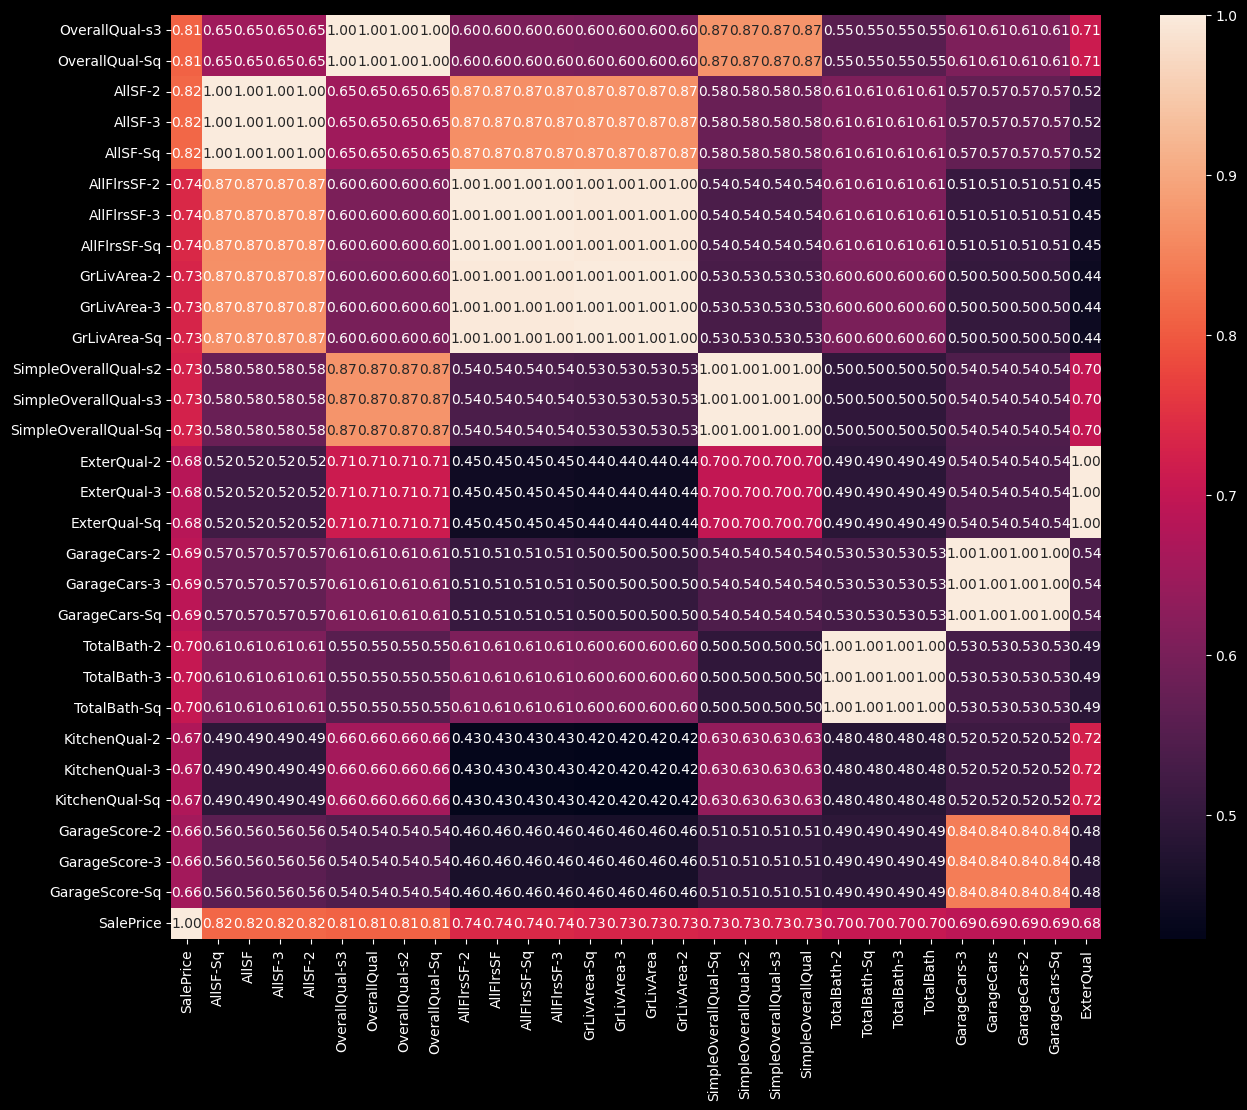

In [117]:
plt.figure(figsize=(15, 12))

corr = pd.concat([train_num, y], axis=1).corr('spearman').sort_values('SalePrice', ascending=False, axis=1)
sns.heatmap(corr.iloc[-30:, :30], fmt='.2f', annot=True)

plt.show()

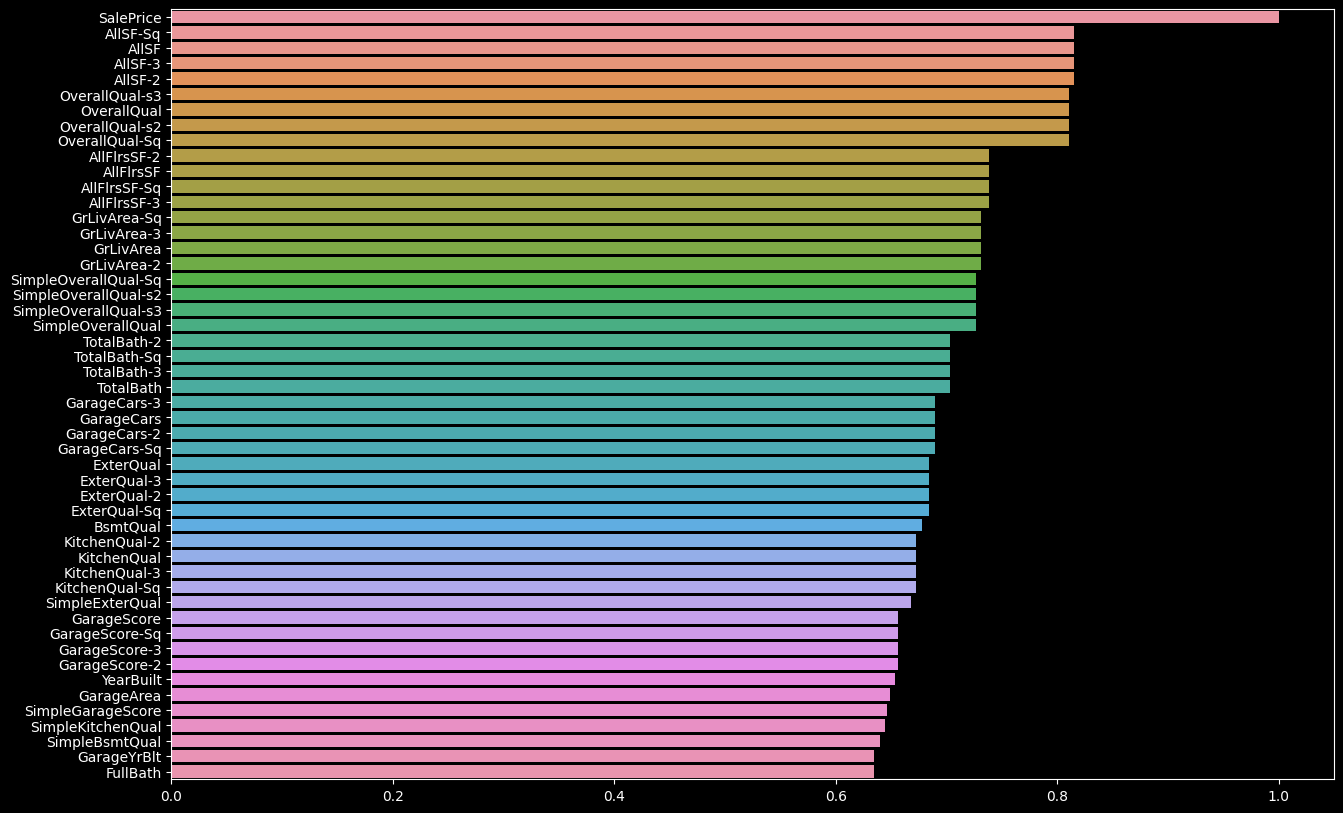

In [118]:
plt.figure(figsize=(15, 10))

corr = pd.concat([train_num, y], axis=1).corr('spearman')['SalePrice'].sort_values(ascending=False).head(50)
sns.barplot(x=corr.values, y=corr.index)


plt.show()

<p>since there are a lot of multicolinearity it will be best to use Regularized model to predict saleprice<p>

<h1>In future what we can do is that rather than changing features type of a existing columnwe will create new features. Like from Utitilites(NoSeWa, Allpub) we would create new column  RankUtilties(2, 4)

<h3>ANOVA</h3>

<p>Now we will do ANOVA test to figure out which categorical values are more important</p>

In [119]:
y.shape, test.shape, train.shape

((1456,), (1459, 143), (1456, 143))

In [120]:
from scipy import stats

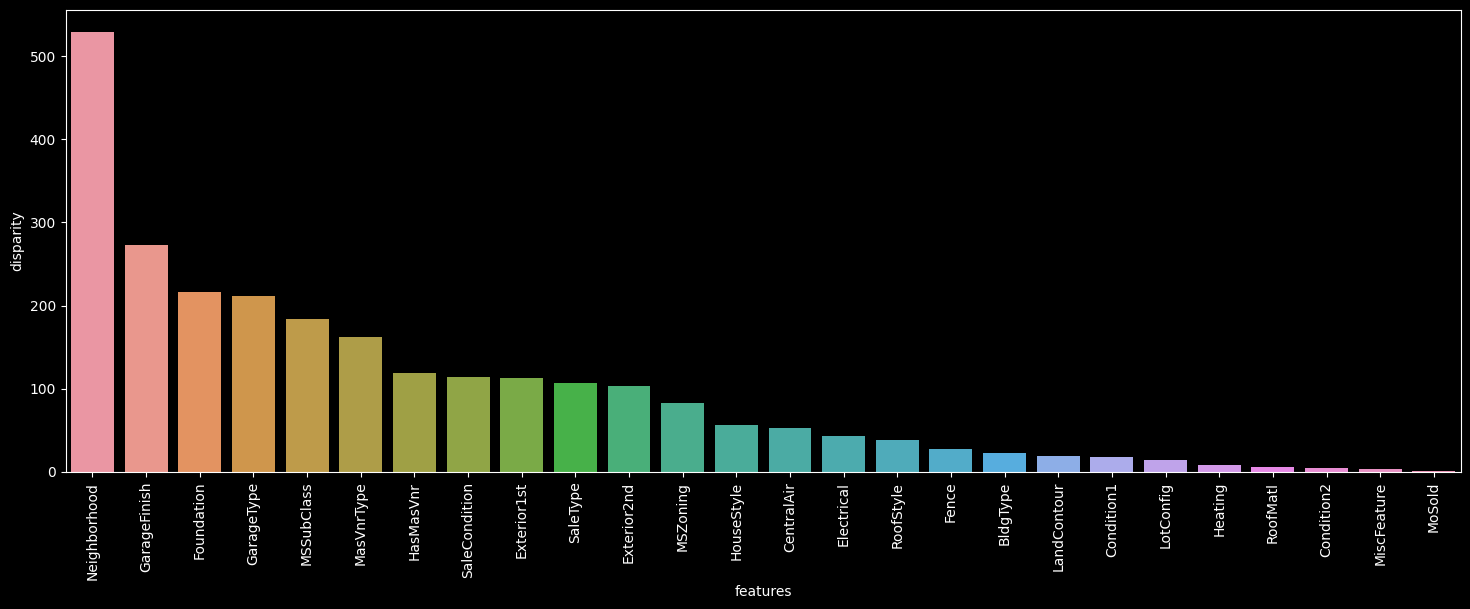

In [121]:
def anova(df, target):
    df = pd.concat([df, target], axis=1)
    features = categorical_features
    
    anv = pd.DataFrame()
    anv['features'] = features 
    
    pvals = []
    for feature in features:
        samples = []
        for cls in df[feature].unique():
            sample = df[df[feature] == cls]['SalePrice'].values
            samples.append(sample)
            
        pval= stats.f_oneway(*samples)[1]
        
        pvals.append(pval)
        
    anv['pvals'] = pvals
         
    return anv.sort_values('pvals')

a = anova(train_cat, y)
a['disparity'] = np.log(1/a['pvals'].values)

sns.barplot(data=a, x='features', y='disparity')
x=plt.xticks(rotation=90)

plt.show()

<p>We can see that Neighborhood has the highest impact on SalePrice</p>

<h3>Univariate analysis</h3>

<h4>Lets Analyze the Taget variable</h4>

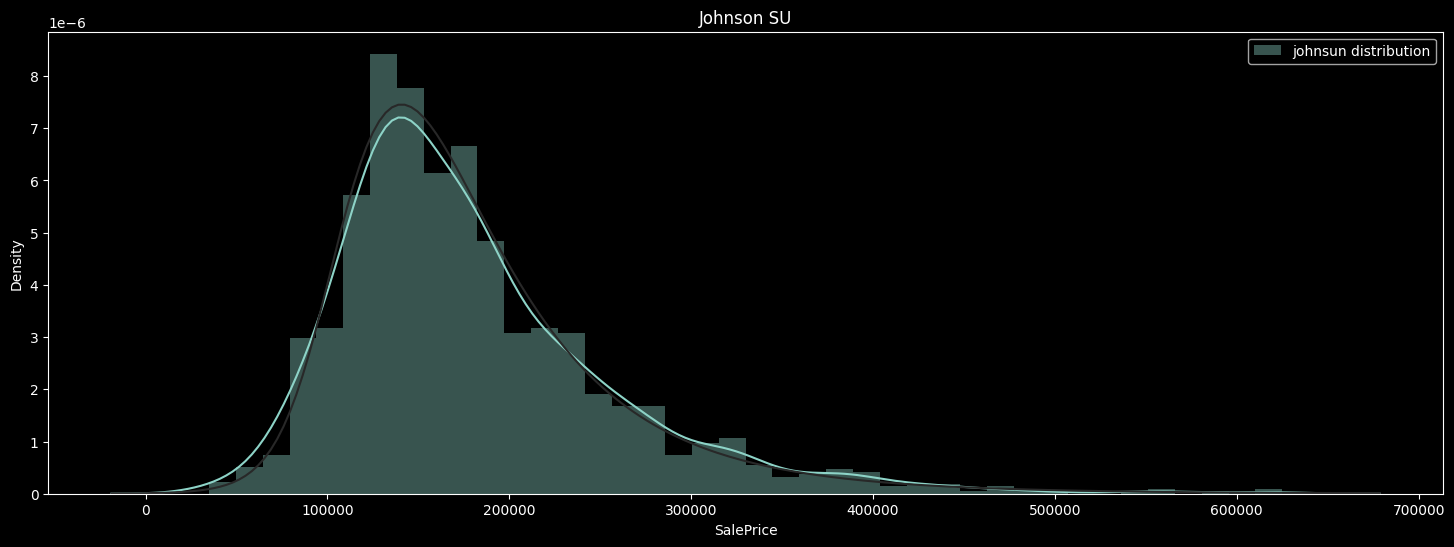

In [122]:
plt.figure(); plt.title('Johnson SU')
sns.distplot(y, kde=True, fit=st.johnsonsu, label='johnsun distribution')

plt.legend()

plt.show()

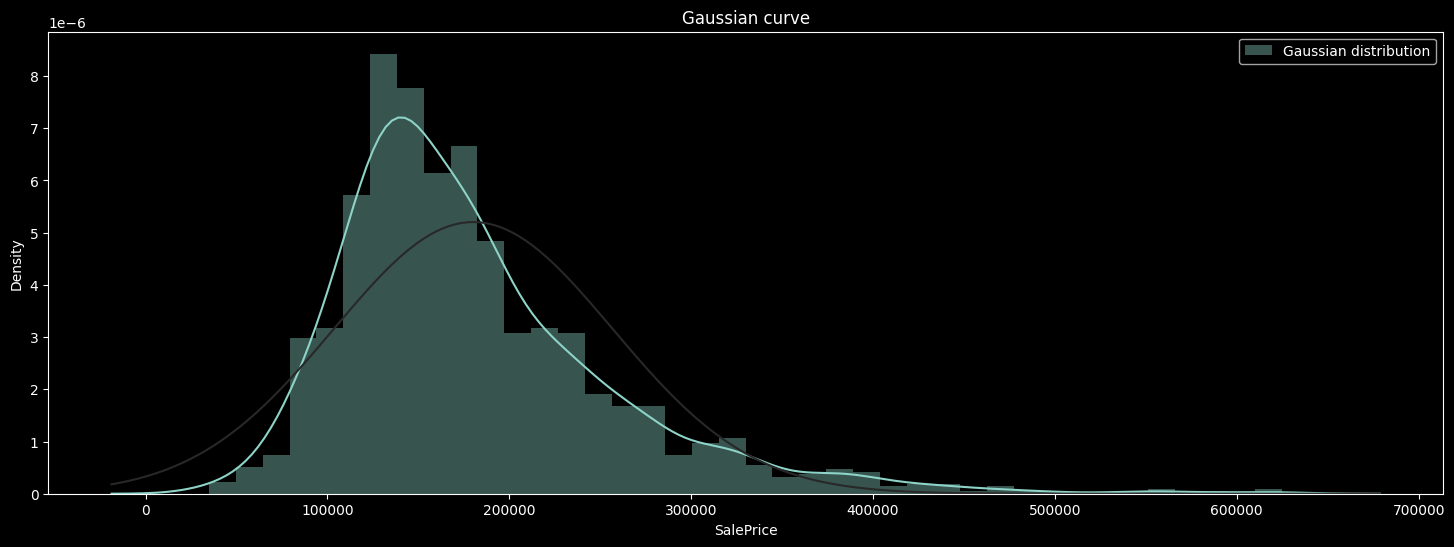

In [123]:
plt.figure(); plt.title('Gaussian curve')
sns.distplot(y, kde=True, fit=st.norm, label='Gaussian distribution')
plt.legend()
plt.show()

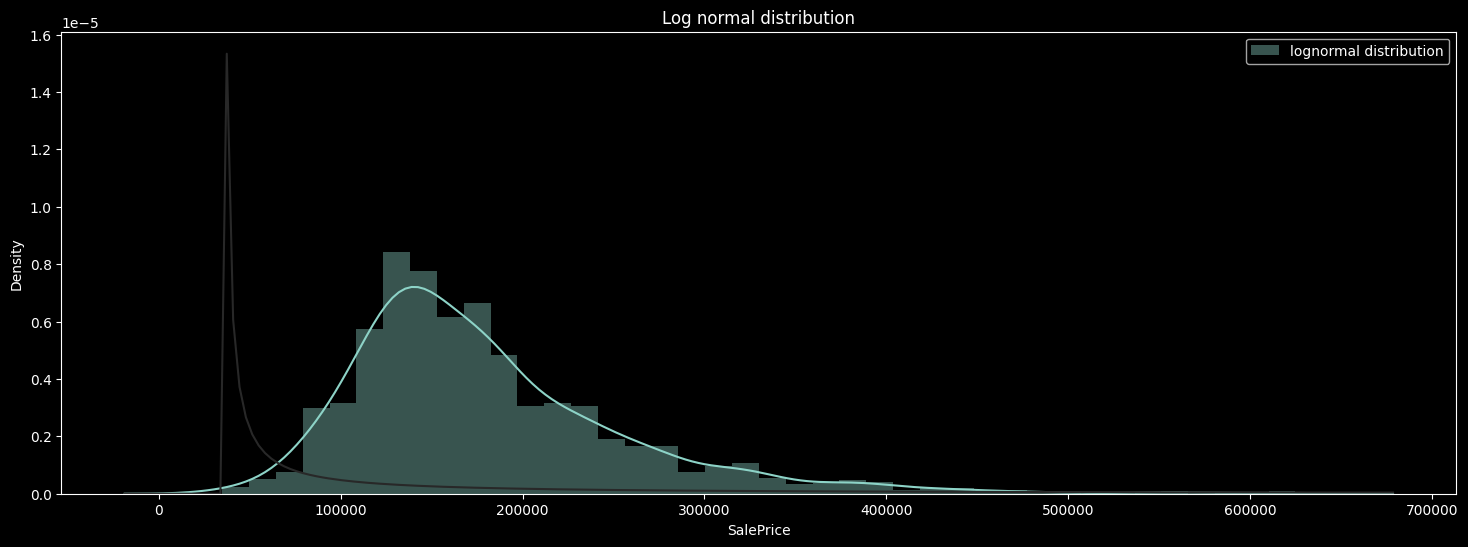

In [124]:
plt.figure(); plt.title('Log normal distribution')
sns.distplot(y, kde=True, fit=st.lognorm, label='lognormal distribution')
plt.legend()
plt.show()

In [125]:
y.describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

<p>Althouh it looks like Johnson Unbounded matches our target values distribution but Log distribution is very close to and since The score in LB would be calculated with log values we will take Logarithom of target value</p>

In [126]:
y = np.log(y)

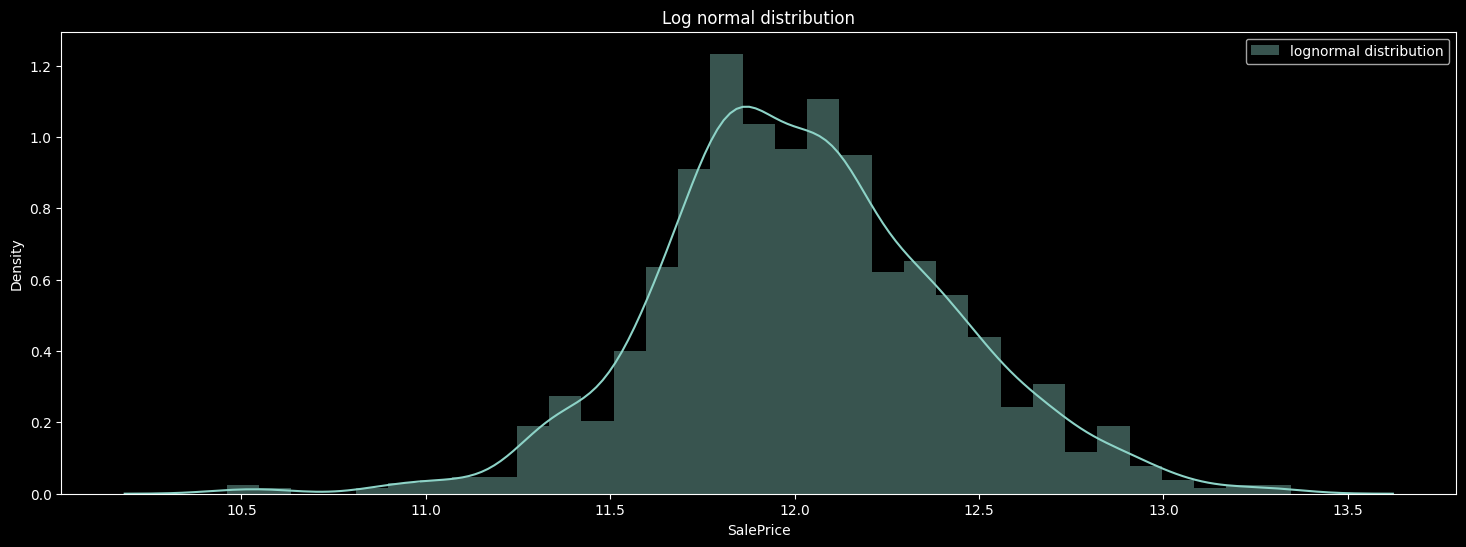

In [127]:
plt.figure(); plt.title('Log normal distribution')
sns.distplot(y, kde=True, label='lognormal distribution')
plt.legend()
plt.show()

In [129]:
d = pd.DataFrame({'a': ['ba', 'ca', np.nan], 'c': ["da", 'aa', 'cd']})
pd.get_dummies(d)

,a_ba,a_ca,c_aa,c_cd,c_da
0,1,0,0,0,1
1,0,1,1,0,0
2,0,0,0,1,0


<p>If there were any null values in our categorical data we could have done something similiar to above. But since there is not some thing like that we do not need to do it</p>

In [137]:
train = pd.concat([train_num, train_cat, y], axis=1)
test = pd.concat([test_num, test_cat], axis=1)

In [138]:
test.shape, train.shape

((1459, 143), (1456, 144))

In [139]:
train.to_csv('./files/train_cleaned.csv', index=False)
test.to_csv('./files/test_cleaned.csv', index=False)

In [141]:
from sklearn.model_selection import KFold

In [148]:
kf = KFold(n_splits=10)
# as split number increases train size increaes
for trains_index, tests_index in kf.split([1, 2, 3, 4, 11, 13, 7, 8, 9, 10]):
    print(trains_index, tests_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [150]:
kf = KFold(n_splits=2)
# as split number decreases train size decreaes and testsize increases
for trains_index, tests_index in kf.split([1, 2, 3, 4, 11, 13, 7, 8, 9, 10]):
    print(trains_index, tests_index)

[5 6 7 8 9] [0 1 2 3 4]
[0 1 2 3 4] [5 6 7 8 9]


<p>Standard split is 5</p>